In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import numpy as np
import pandas as pd
import math
import urllib.request
import matplotlib.pyplot as plt
import matplotlib as mpl

# Đọc dữ liệu + encode

In [92]:
def readImageFiles(img_dir="digitdata/trainingimages"):
    with open(img_dir) as digitTxt:
        image = [list(line)[0:28] for line in digitTxt]
        rows = len(image)
        
    for i in range(rows):
        for j in range(28):
            if image[i][j] == ' ':
                image[i][j] = 0
            else:
                image[i][j] = 1
    return image

In [93]:
def readLabelFiles(name):
    with open(name) as label:
        labels = []
        for line in label:
            labels.append(line[0])
    return labels

In [94]:
# Getting the data
Xtrain = readImageFiles("/content/drive/MyDrive/năm 3/Học máy/NiaveBayes/trainingimages")
Ytrain = readLabelFiles("/content/drive/MyDrive/năm 3/Học máy/NiaveBayes/traininglabels")
Xtest =readImageFiles("/content/drive/MyDrive/năm 3/Học máy/NiaveBayes/testimages")
Ytest =readLabelFiles("/content/drive/MyDrive/năm 3/Học máy/NiaveBayes/testlabels")

In [95]:
def unrollImg(img):
    image_num = int(len(img)/28)     #each img consists of 28 lines
    unrolledImg = [[] for x in range(image_num)]          # 5000*784
    offset = 0
    for i in range(image_num):  # i: 0--5000
        for j in range(28):   # j: 0--28  roll num in rolled img
            unrolledImg[i] += img[offset+j]
        offset +=28

    return np.array(unrolledImg)

In [96]:
Xtrain = unrollImg(Xtrain)
Xtest = unrollImg(Xtest)
Ytrain = np.array(Ytrain)
Ytest = np.array(Ytest)

# Show thử

In [53]:
i = [range(10)]

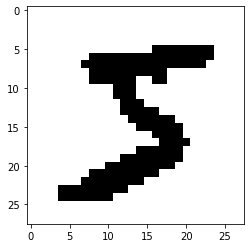

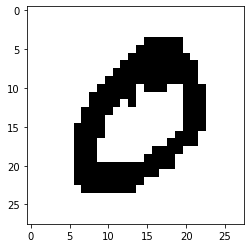

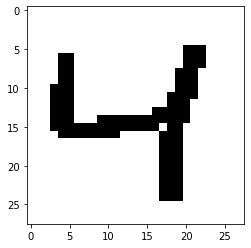

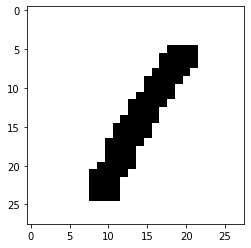

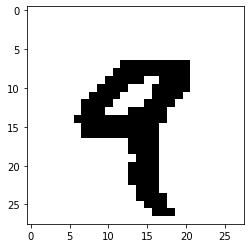

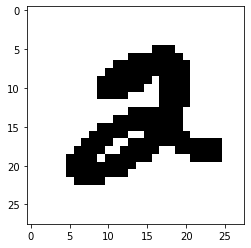

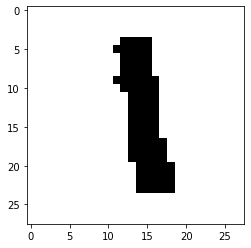

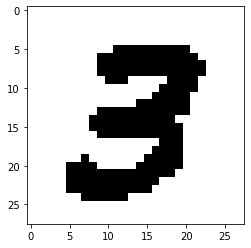

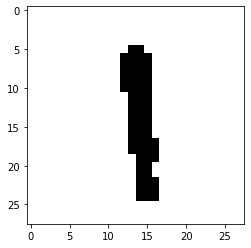

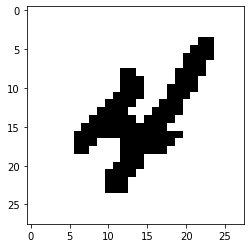

In [54]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
for i in range(10):
  some_digit = Xtrain[i]
  some_digit_image = some_digit.reshape(28, 28)
  plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest") 
  plt.show()

In [55]:
Xtrain.shape

(5000, 784)

In [56]:
Xtest.shape

(1000, 784)

# Naive Bayes implement

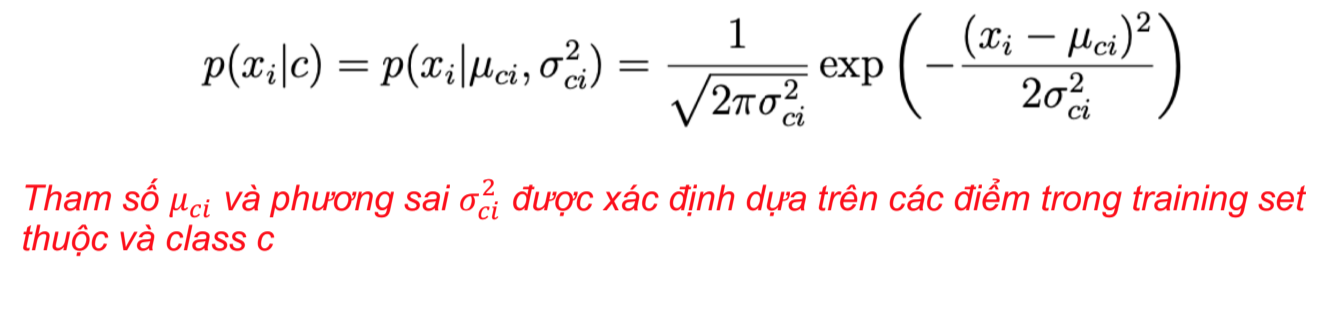

In [57]:
class NaiveBayes:
    def fit(self, X, y,sm):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        smoothing = sm
        # Tính trung bình, phương sai, và P(class) tỉ lệ mỗi class trong tập dữ liệu
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)+ smoothing
            self._var[idx, :] = X_c.var(axis=0) + smoothing 
            self._priors[idx] = X_c.shape[0] / float(n_samples) # P(class) tỉ lệ xuất hiện số đấy trong tập dữ liệu 

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate P(Xi|Ci) cho mõi lớp
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx]) #log(P(class)) 
            posterior = np.sum(np.log(self._pdf(idx, x))) #log(P(xi|class))
            posterior = prior + posterior
            posteriors.append(posterior)

        # Trả về lớp có xác suất cao nhất
        return self._classes[np.argmax(posteriors)]

    #P(Xi|C)
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var ** 2))
        denominator = np.sqrt(2 * np.pi * var**2)
        return numerator / denominator
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


# Laplace Smoothing

In [58]:
nb = NaiveBayes()
acc = []
nb.fit(Xtrain, Ytrain, 0.1)
ypred = nb.predict(Xtest)





> Thử trong khoảng từ 0 - 10 và xem thay đổi 





In [59]:
for i in np.arange(0,10,0.1):
  nb.fit(Xtrain, Ytrain,i)
  ypred = nb.predict(Xtest)
  print((i,accuracy(Ytest, ypred)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


(0.0, 0.09)
(0.1, 0.771)
(0.2, 0.738)
(0.30000000000000004, 0.624)
(0.4, 0.437)
(0.5, 0.265)
(0.6000000000000001, 0.147)
(0.7000000000000001, 0.115)
(0.8, 0.108)
(0.9, 0.108)
(1.0, 0.108)
(1.1, 0.108)
(1.2000000000000002, 0.108)
(1.3, 0.108)
(1.4000000000000001, 0.108)
(1.5, 0.108)
(1.6, 0.108)
(1.7000000000000002, 0.108)
(1.8, 0.108)
(1.9000000000000001, 0.108)
(2.0, 0.108)
(2.1, 0.108)
(2.2, 0.108)
(2.3000000000000003, 0.108)
(2.4000000000000004, 0.108)
(2.5, 0.108)
(2.6, 0.108)
(2.7, 0.108)
(2.8000000000000003, 0.108)
(2.9000000000000004, 0.108)
(3.0, 0.108)
(3.1, 0.108)
(3.2, 0.108)
(3.3000000000000003, 0.108)
(3.4000000000000004, 0.108)
(3.5, 0.108)
(3.6, 0.108)
(3.7, 0.108)
(3.8000000000000003, 0.108)
(3.9000000000000004, 0.108)
(4.0, 0.108)
(4.1000000000000005, 0.108)
(4.2, 0.108)
(4.3, 0.108)
(4.4, 0.108)
(4.5, 0.108)
(4.6000000000000005, 0.108)
(4.7, 0.108)
(4.800000000000001, 0.108)
(4.9, 0.108)
(5.0, 0.108)
(5.1000000000000005, 0.108)
(5.2, 0.108)
(5.300000000000001, 0.108)




> Từ kết quả ở trên ta thấy khoảng 0 - 0.4 được kết quả cao nhất nên tiếp dụng chạy với tỉ lệ nhỏ hơn để xem biến thiên



In [60]:
for i in np.arange(0,0.4,0.01):
  nb.fit(Xtrain, Ytrain,i)
  ypred = nb.predict(Xtest)
  print((i,accuracy(Ytest, ypred)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


(0.0, 0.09)
(0.01, 0.684)
(0.02, 0.73)
(0.03, 0.751)
(0.04, 0.755)
(0.05, 0.762)
(0.06, 0.763)
(0.07, 0.769)
(0.08, 0.77)
(0.09, 0.768)
(0.1, 0.771)
(0.11, 0.77)
(0.12, 0.77)
(0.13, 0.77)
(0.14, 0.771)
(0.15, 0.77)
(0.16, 0.764)
(0.17, 0.757)
(0.18, 0.75)
(0.19, 0.749)
(0.2, 0.738)
(0.21, 0.731)
(0.22, 0.724)
(0.23, 0.717)
(0.24, 0.706)
(0.25, 0.695)
(0.26, 0.678)
(0.27, 0.668)
(0.28, 0.653)
(0.29, 0.64)
(0.3, 0.624)
(0.31, 0.606)
(0.32, 0.59)
(0.33, 0.576)
(0.34, 0.557)
(0.35000000000000003, 0.543)
(0.36, 0.528)
(0.37, 0.506)
(0.38, 0.484)
(0.39, 0.462)


Từ kết quả này ta thấy smoothing thuộc khoảng {0.1 - 0.14} là đạt kết quả cao nhất 

# Confusion matrix

In [61]:
def confusionMatrixx(Ytest, ypred):
  confusionMatrix = np.zeros((10,10))
  classes = []
  #totalTrue = np.zeros(10)
  #totalPred = np.zeros(10)
  for i in range(len(ypred)):
          trueClass = int(Ytest[i])
          classes.append(trueClass)
          predClass = int(ypred[i])
          #totalTrue[trueClass] += 1
          #totalPred[predClass] += 1
          confusionMatrix[predClass][trueClass] += 1
  recall = 0
  precision = 0
  for trueClass in classes:
      TP = confusionMatrix[trueClass][trueClass]
      for predClass in classes:
          
          if predClass != trueClass:
              FP = confusionMatrix[predClass][trueClass]
              FN = confusionMatrix[trueClass][predClass]
              TN = confusionMatrix[predClass][predClass]
      recall += TP / (TP + FN)
      precision += TP / (TP + FP)
  confusionMatrix1 = np.zeros((10,10))
  for i in range(10):
    for j in range(10):
      confusionMatrix1[j][i] = (round(confusionMatrix[j][i]/confusionMatrix.T[:][i].sum(),3))    
  Recall = recall/len(classes)
  Precision = precision/len(classes)
  for i in range(10):
    for j in range(10):
      confusionMatrix[i][j]= confusionMatrix[i][j]/confusionMatrix.T[j].sum()
  print("Recall: ",Recall)
  print("Precision: ",Precision)
  print("confusionMatrix: ")
  print(confusionMatrix1)


# K cross

In [62]:
def KcrossValidation(Xtrain, Ytrain, K, sm):  
  accuracys = []
  #accuracys1 = []
  subset_size = int(len(Xtrain)/K)
  nb = NaiveBayes()
  for i in range(K):
      Xtestt = Xtrain[i*subset_size:][:subset_size]
      Xtrainn = [*Xtrain[i*subset_size:], *Xtrain[(i+1)*subset_size:]]
      Ytestt = Ytrain[i*subset_size:][:subset_size]
      Ytrainn = [*Ytrain[i*subset_size:], *Ytrain[(i+1)*subset_size:]]
      Ytrainn = np.array(Ytrainn)
      Ytestt = np.array(Ytestt)
      Xtrainn = np.array(Xtrainn)
      Xtestt = np.array(Xtestt)

      nb.fit(Xtrainn, Ytrainn, sm)

      ypred = nb.predict(Xtestt)
      accuracys.append(accuracy(Ytestt, ypred))

      #ypred1 = nb.predict(Xtest)
      #accuracys1.append(accuracy(Ytest, ypred1))
  print("-------------------",K,"----", sm)
  print("Train",sum(accuracys)/K)
  #print("Test",sum(accuracys1)/K)
  confusionMatrixx(Ytestt, ypred)
  #confusionMatrixx(Ytest, ypred1)



> Chạy K-cross validation trong khoảng 1 - 10 kèm theo đó smoothing thay đổi từ 0.01 đến 0.1 (step = 0.01) và xem thay đổi



In [97]:
Xtrain.shape

(5000, 784)

In [98]:
Ytrain.shape

(5000,)

In [128]:
Train = pd.DataFrame(Xtrain, Ytrain)
Test =  pd.DataFrame(Xtest, Ytest)
data = pd.concat([Train, Test])
data = data.sample(frac=1) #trộn tập dữ liệu
Y = np.array(data.index)
X = np.array(data)

In [129]:
X.shape

(6000, 784)

In [130]:
for k in range(2,10):
  for sm in np.arange(0.07, 0.20, 0.01):
    KcrossValidation(X, Y, k, sm)


------------------- 2 ---- 0.07
Train 0.8328333333333333
Recall:  0.9877172285773008
Precision:  0.9912804146398936
confusionMatrix: 
[[0.887 0.    0.01  0.003 0.003 0.026 0.007 0.003 0.007 0.017]
 [0.    0.902 0.    0.003 0.    0.    0.004 0.003 0.007 0.   ]
 [0.021 0.018 0.864 0.079 0.021 0.011 0.026 0.015 0.025 0.007]
 [0.    0.006 0.032 0.763 0.    0.064 0.    0.003 0.046 0.013]
 [0.    0.    0.006 0.01  0.838 0.011 0.007 0.051 0.011 0.081]
 [0.067 0.046 0.    0.053 0.058 0.843 0.048 0.018 0.095 0.027]
 [0.014 0.006 0.029 0.007 0.009 0.015 0.904 0.    0.    0.   ]
 [0.    0.    0.003 0.023 0.    0.004 0.    0.846 0.004 0.061]
 [0.011 0.021 0.049 0.033 0.018 0.022 0.004 0.    0.781 0.013]
 [0.    0.    0.006 0.026 0.052 0.004 0.    0.06  0.025 0.781]]
------------------- 2 ---- 0.08
Train 0.8348333333333333
Recall:  0.9874190454878258
Precision:  0.991291202642803
confusionMatrix: 
[[0.884 0.    0.01  0.003 0.003 0.026 0.007 0.003 0.007 0.017]
 [0.    0.92  0.003 0.007 0.    0.    0

# Pooling 2x2

In [131]:
def maxpooling(X):
  m = len(X)
  n = len(X[0])
  newX = np.zeros((m//2,n//2))
  xRow = [1,1,0]
  yCol = [0,1,1]

  for i in range(0,m,2):
    for j in range(0,n,2):
      currentPixels = [X[i][j]]
      for k in range(3):
        neiX = i+xRow[k]
        neiY = j+yCol[k]
        if neiX < m and neiY < n:
          currentPixels.append(X[neiX][neiY])
        newX[i//2][j//2]= max(currentPixels)
  return newX

In [132]:
XtrainP = Xtrain
XtestP = Xtest
XtrainP = [maxpooling(x.reshape(28,28)) for x in XtrainP]
XtestP = [maxpooling(x.reshape(28,28)) for x in XtestP]

In [133]:
XtrainP = np.array([x.reshape(196) for x in XtrainP])
XtestP = np.array([x.reshape(196) for x in XtestP])

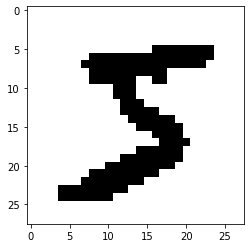

In [134]:
plt.imshow(Xtrain[0].reshape(28,28), cmap = mpl.cm.binary, interpolation="nearest") 
plt.show()

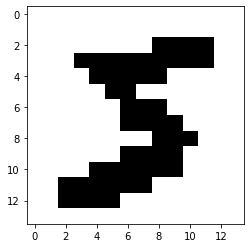

In [135]:
plt.imshow(XtrainP[0].reshape(14,14), cmap = mpl.cm.binary, interpolation="nearest") 
plt.show()

In [136]:
model = NaiveBayes()
model.fit(XtrainP, Ytrain,0.1)
accuracy(Ytest, model.predict(XtestP))

0.754

In [137]:
Train = pd.DataFrame(XtrainP, Ytrain)
Test =  pd.DataFrame(XtestP, Ytest)
data = pd.concat([Train, Test])
Y = np.array(data.index)
X = np.array(data)

In [138]:
X.shape

(6000, 196)

In [139]:
Y.shape

(6000,)

In [140]:
for k in range(2,10):
  for sm in np.arange(0.07, 0.20, 0.01):
    KcrossValidation(X, Y, k, sm)

------------------- 2 ---- 0.07
Train 0.8033333333333333
Recall:  0.9829440104855605
Precision:  0.9312132161587487
confusionMatrix: 
[[0.835 0.    0.01  0.    0.    0.032 0.01  0.    0.01  0.01 ]
 [0.    0.928 0.003 0.007 0.    0.008 0.003 0.012 0.01  0.006]
 [0.004 0.021 0.856 0.04  0.009 0.012 0.024 0.021 0.039 0.013]
 [0.004 0.003 0.027 0.765 0.    0.056 0.    0.003 0.076 0.019]
 [0.    0.003 0.024 0.01  0.877 0.008 0.024 0.049 0.049 0.153]
 [0.12  0.03  0.021 0.091 0.069 0.857 0.066 0.015 0.158 0.023]
 [0.039 0.012 0.024 0.007 0.013 0.016 0.864 0.    0.01  0.   ]
 [0.    0.    0.003 0.04  0.013 0.004 0.    0.865 0.013 0.172]
 [0.    0.003 0.027 0.034 0.    0.008 0.007 0.009 0.625 0.003]
 [0.    0.    0.003 0.007 0.019 0.    0.    0.024 0.01  0.601]]
------------------- 2 ---- 0.08
Train 0.8048333333333333
Recall:  0.9818055707292717
Precision:  0.9344983528646766
confusionMatrix: 
[[0.842 0.    0.01  0.    0.    0.032 0.01  0.    0.01  0.01 ]
 [0.    0.937 0.007 0.01  0.003 0.012 

In [141]:
def meanpooling(X):
  m = len(X)
  n = len(X[0])
  newX = np.zeros((m//2,n//2))
  xRow = [1,1,0]
  yCol = [0,1,1]

  for i in range(0,m,2):
    for j in range(0,n,2):
      currentPixels = [X[i][j]]
      for k in range(3):
        neiX = i+xRow[k]
        neiY = j+yCol[k]
        if neiX < m and neiY < n:
          currentPixels.append(X[neiX][neiY])
        newX[i//2][j//2]= np.mean(currentPixels)
  return newX

In [142]:
XtrainP = Xtrain
XtestP = Xtest
XtrainP = [meanpooling(x.reshape(28,28)) for x in XtrainP]
XtestP = [meanpooling(x.reshape(28,28)) for x in XtestP]

XtrainP = np.array([x.reshape(196) for x in XtrainP])
XtestP = np.array([x.reshape(196) for x in XtestP])

In [143]:
model = NaiveBayes()
model.fit(XtrainP, Ytrain,0.1)
accuracy(Ytest, model.predict(XtestP))

0.767

In [144]:
Train = pd.DataFrame(Xtrain, Ytrain)
Test =  pd.DataFrame(Xtest, Ytest)
data = pd.concat([Train, Test])
Y = np.array(data.index)
X = np.array(data)

In [145]:
for i in range(2,10):
  for sm in np.arange(0.07, 0.20, 0.01):
    KcrossValidation(X, Y, i, x)

------------------- 2 ---- 0.29000000000000004
Train 0.7276666666666667
Recall:  0.9675367026563927
Precision:  0.9441566280195328
confusionMatrix: 
[[0.704 0.    0.01  0.    0.    0.008 0.003 0.    0.    0.   ]
 [0.    0.994 0.253 0.168 0.069 0.147 0.182 0.104 0.355 0.081]
 [0.    0.003 0.599 0.013 0.    0.    0.    0.003 0.01  0.   ]
 [0.004 0.    0.007 0.685 0.    0.052 0.    0.    0.069 0.013]
 [0.004 0.    0.038 0.01  0.858 0.032 0.028 0.018 0.066 0.065]
 [0.19  0.    0.003 0.05  0.    0.667 0.045 0.    0.066 0.01 ]
 [0.088 0.    0.034 0.003 0.009 0.016 0.734 0.    0.013 0.   ]
 [0.004 0.    0.017 0.04  0.028 0.044 0.007 0.844 0.016 0.101]
 [0.    0.    0.024 0.01  0.    0.    0.    0.    0.322 0.003]
 [0.007 0.003 0.014 0.02  0.035 0.036 0.    0.031 0.082 0.727]]
------------------- 2 ---- 0.29000000000000004
Train 0.7276666666666667
Recall:  0.9675367026563927
Precision:  0.9441566280195328
confusionMatrix: 
[[0.704 0.    0.01  0.    0.    0.008 0.003 0.    0.    0.   ]
 [0.    